In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load the dataset
data = pd.read_csv('ecosystem_data.csv')
data

,water_quality,air_quality_index,biodiversity_index,vegetation_cover,soil_ph,ecosystem_health
0,37.454012,112.092246,0.729998,63.814457,5.144016,degraded
1,95.071431,99.873629,0.184512,45.929245,4.021498,degraded
2,73.199394,52.846174,0.346640,96.449852,4.194976,degraded
3,59.865848,182.180001,0.663281,21.897845,4.493691,degraded
4,15.601864,142.987248,0.482089,58.785642,4.620093,degraded
...,...,...,...,...,...,...
9995,85.765599,263.111589,0.952275,75.403391,6.923449,degraded
9996,89.750884,14.044187,0.747824,76.452694,4.744065,at risk
9997,94.670792,91.109541,0.019456,26.956943,7.619473,degraded
9998,39.748799,132.996002,0.401005,43.431977,6.365560,degraded


In [7]:
data['ecosystem_health'].unique()

array(['degraded', 'at risk', 'healthy'], dtype=object)

In [9]:
# Encode target labels
data['ecosystem_health'] = data['ecosystem_health'].map({'healthy': 0, 'at risk': 1, 'degraded': 2})

In [11]:
X = data[['water_quality', 'air_quality_index', 'biodiversity_index', 'vegetation_cover', 'soil_ph']]
y = data['ecosystem_health']

In [53]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority') 
X,y=smote.fit_resample(X,y)
y.value_counts()

ecosystem_health
2    8761
1    8761
0    8761
Name: count, dtype: int64

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [59]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 2, ..., 1, 0, 2], dtype=int64)

In [61]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9433136770020925


In [63]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Healthy', 'At Risk', 'Degraded']))

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.93      0.97      0.95      1769
     At Risk       0.92      0.91      0.91      1731
    Degraded       0.99      0.95      0.97      1757

    accuracy                           0.94      5257
   macro avg       0.94      0.94      0.94      5257
weighted avg       0.94      0.94      0.94      5257



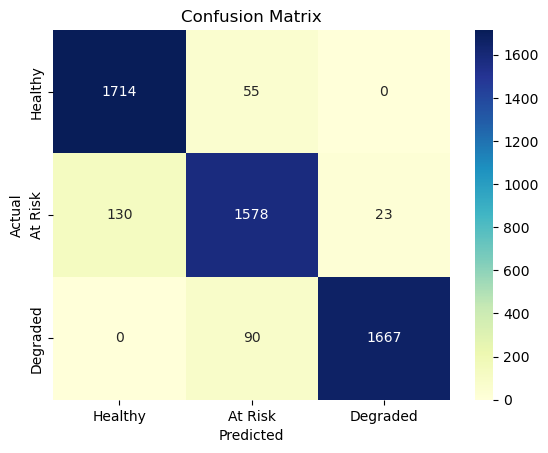

In [65]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=['Healthy', 'At Risk', 'Degraded'], 
            yticklabels=['Healthy', 'At Risk', 'Degraded'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [67]:
import joblib

In [69]:
joblib.dump(model, "Ecosystem_Health_Calculator.pkl")

['Ecosystem_Health_Calculator.pkl']

In [71]:
eco_health = joblib.load('Ecosystem_Health_Calculator.pkl')

In [73]:
X.columns

Index(['water_quality', 'air_quality_index', 'biodiversity_index',
       'vegetation_cover', 'soil_ph'],
      dtype='object')

In [75]:
data.describe()

,water_quality,air_quality_index,biodiversity_index,vegetation_cover,soil_ph,ecosystem_health
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,49.415956,151.358963,0.500050,49.871338,6.232751,1.864200
std,28.763013,86.788365,0.286774,28.899459,1.591063,0.375729
min,0.001163,0.047323,0.000048,0.000554,3.500092,0.000000
25%,24.632887,76.183740,0.253748,24.685725,4.843497,2.000000
50%,49.252862,151.769033,0.502068,50.003024,6.215445,2.000000
75%,74.000635,226.943766,0.744674,74.711625,7.627624,2.000000
max,99.971767,299.977448,0.999901,99.978937,8.999847,2.000000


In [77]:
wq = float(input("Enter the water quality: "))
aqi = float(input("Enter AQI: "))
bdi = float(input("Enter BDI: "))
vc = float(input("Enter the vegitation cover: "))
sph = float(input("Enter the Soil pH: "))
new_data = np.array([[wq, aqi, bdi, vc, sph]])
prediction = eco_health.predict(new_data)
print(f"The Ecosystem Health for water quality  {wq}, AQI {aqi}, BDI {bdi}, Vegitation Cover {vc} and Soil pH {sph} is {prediction[0]}")

Enter the water quality:  60
Enter AQI:  150
Enter BDI:  0.6
Enter the vegitation cover:  65
Enter the Soil pH:  6


The Ecosystem Health for water quality  60.0, AQI 150.0, BDI 0.6, Vegitation Cover 65.0 and Soil pH 6.0 is 1


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [49]:
y.value_counts()

ecosystem_health
2    8761
1    1120
0     119
Name: count, dtype: int64